In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

c:\Users\hanna\.conda\envs\study\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing da

In [21]:
rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring='neg_mean_squared_error', cv=5) #cross_val_score 교차검증만, 튜닝은 x
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5교차 검증의 개별 Negative MSE scores:', np.round(neg_mse_scores, 2))
print('5교차 검증의 개별 RMSE scores:', np.round(rmse_scores, 2))
print('5교차 검증의 평균 RMSE:{0:.3f}'.format(avg_rmse))

5교차 검증의 개별 Negative MSE scores: [ -7.88 -13.14 -20.57 -46.23 -18.88]
5교차 검증의 개별 RMSE scores: [2.81 3.63 4.54 6.8  4.34]
5교차 검증의 평균 RMSE:4.423


### 함수

In [22]:
# 함수로 만듬
def get_model_cv_predict(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('#####', model.__class__.__name__, '####') #모델명 표현
    print('5교차 검증의 평균 RMSE:{0:.3f}'.format(avg_rmse))

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [24]:
dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000) #시간 오래걸리는 모델
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

In [25]:
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_predict(model, X_data, y_target)

##### DecisionTreeRegressor ####
5교차 검증의 평균 RMSE:5.978
##### RandomForestRegressor ####
5교차 검증의 평균 RMSE:4.423
##### GradientBoostingRegressor ####
5교차 검증의 평균 RMSE:4.269
##### XGBRegressor ####
5교차 검증의 평균 RMSE:4.251
##### LGBMRegressor ####
5교차 검증의 평균 RMSE:4.646


<AxesSubplot: >

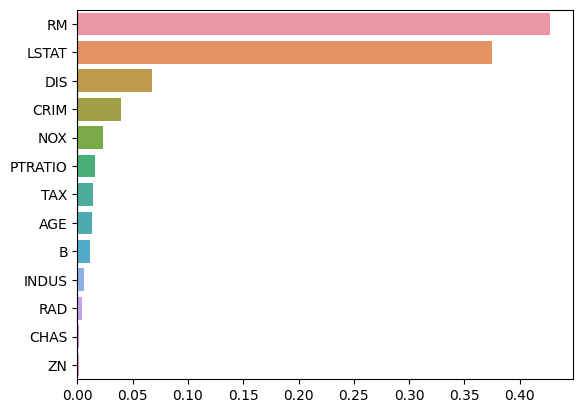

In [27]:
import seaborn as sns

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

(100, 2)


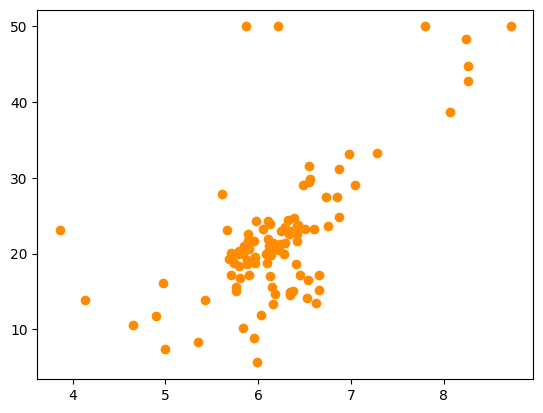

In [32]:
import matplotlib.pyplot as plt

bostonDF_sample = bostonDF[['RM', 'PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100, random_state=0) #sample 100개만 돌림
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange') #bostonDF_sample['RM'] == bostonDF_sample.RM

In [37]:
from sklearn.linear_model import LinearRegression
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

X_feature = bostonDF_sample['RM'].values.reshape(-1, 1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1, 1)

In [38]:
X_test

array([[4.5 ],
       [4.54],
       [4.58],
       [4.62],
       [4.66],
       [4.7 ],
       [4.74],
       [4.78],
       [4.82],
       [4.86],
       [4.9 ],
       [4.94],
       [4.98],
       [5.02],
       [5.06],
       [5.1 ],
       [5.14],
       [5.18],
       [5.22],
       [5.26],
       [5.3 ],
       [5.34],
       [5.38],
       [5.42],
       [5.46],
       [5.5 ],
       [5.54],
       [5.58],
       [5.62],
       [5.66],
       [5.7 ],
       [5.74],
       [5.78],
       [5.82],
       [5.86],
       [5.9 ],
       [5.94],
       [5.98],
       [6.02],
       [6.06],
       [6.1 ],
       [6.14],
       [6.18],
       [6.22],
       [6.26],
       [6.3 ],
       [6.34],
       [6.38],
       [6.42],
       [6.46],
       [6.5 ],
       [6.54],
       [6.58],
       [6.62],
       [6.66],
       [6.7 ],
       [6.74],
       [6.78],
       [6.82],
       [6.86],
       [6.9 ],
       [6.94],
       [6.98],
       [7.02],
       [7.06],
       [7.1 ],
       [7.

In [47]:
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

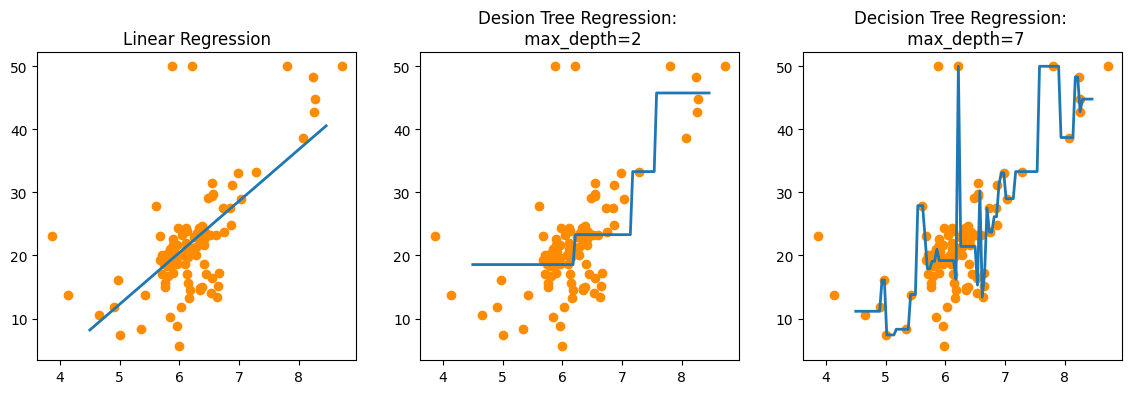

In [52]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax1.plot(X_test, pred_lr, label='linear', linewidth=2)

ax2.set_title('Desion Tree Regression: \n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax2.plot(X_test, pred_rf2, label='max_depth:3', linewidth=2)

ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax3.plot(X_test, pred_rf7, label='max_depth:7', linewidth=2)